# 1. Contextualização

O crescimento do mercado de dados no Brasil, evidenciado por pesquisas recentes como o State of Data BR 2023, reforça a importância de compreender os fatores que influenciam a remuneração dos profissionais da área. A correta análise desses fatores pode apoiar estratégias de retenção de talentos, definição de salários e planejamento de carreira.

Neste projeto, modelamos a previsão da faixa salarial com base em variáveis divididas em três grupos: fatores demográficos (faixa etária, gênero, raça/etnia, escolaridade), fatores profissionais (experiência prévia em dados, nível de senioridade, função de gestão, porte da empresa) e fatores modernos (modelo de trabalho e uso de Inteligência Artificial).

A abordagem prevê a utilização de técnicas de machine learning supervisionado para entender a relação entre as variáveis independentes e a variável dependente (faixa salarial). A análise dos resultados permitirá identificar quais fatores possuem maior impacto no salário e em que magnitude, contribuindo para uma compreensão mais estruturada do cenário atual do mercado de dados no Brasil.

# 2. Pré-processamento

## 2.1 Leitura de dados

Essa célula realiza a leitura do Dataset.

In [5]:
import pandas as pd

def get_file_path():
    import os
    # Load the data
    if os.path.exists('/kaggle'):
        file_path = '/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv'
    else:
        default_directory = './'
        os.chdir(default_directory)
        file_path = './input/state-of-data-brazil-2023⁄State_of_data_BR_2023_Kaggle.csv'
    return file_path

# Carregando o DataFrame
file_path = get_file_path()
df = pd.read_csv(file_path)


# Agrupamento de Faixas Salariaias 
## Objetivo
Transformar as 14 faixas salariais originais em categorias mais significativas socialmente, utilizando o salário mínimo como o valor de 2023, de 1.302 reais.

| Faixa Consolidada | Intervalo Mensal | Múltiplos do SM | Inclusão Original |
|-------------------|------------------|-----------------|-------------------|
| **0-2 SM** | R$ 0-2.604 | 0-2x | R$ 0-2.000/mês, R$ 2.001-3.000/mês |
| **2-3 SM** | R$ 2.605-3.906 | 2-3x | R$ 3.001-4.000/mês |
| **3-5 SM** | R$ 3.907-6.510 | 3-5x | R$ 4.001-6.000/mês |
| **5-10 SM** | R$ 6.511-13.020 | 5-10x | R$ 6.001-8.000/mês, R$ 8.001-12.000/mês |
| **10-15 SM** | R$ 13.021-19.530 | 10-15x | R$ 12.001-16.000/mês, R$ 16.001-20.000/mês |
| **15+ SM** | ≥ R$ 19.531 | 15x+ | Todas acima de R$ 20.001/mês |


In [6]:
# Definindo as novas faixas consolidadas
novas_faixas = {
    '0-2 SM (R$ 0-2.604)': [
        'Menos de R$ 1.000/mês',
        'de R$ 101/mês a R$ 2.000/mês', 
        'de R$ 1.001/mês a R$ 2.000/mês',
        'de R$ 2.001/mês a R$ 3.000/mês'
    ],
    '2-3 SM (R$ 2.605-3.906)': [
        'de R$ 3.001/mês a R$ 4.000/mês'
    ],
    '3-5 SM (R$ 3.907-6.510)': [
        'de R$ 4.001/mês a R$ 6.000/mês'
    ],
    '5-10 SM (R$ 6.511-13.020)': [
        'de R$ 6.001/mês a R$ 8.000/mês',
        'de R$ 8.001/mês a R$ 12.000/mês'
    ],
    '10-15 SM (R$ 13.021-19.530)': [
        'de R$ 12.001/mês a R$ 16.000/mês',
        'de R$ 16.001/mês a R$ 20.000/mês'
    ],
    '15+ SM (≥ R$ 19.531)': [
        'de R$ 20.001/mês a R$ 25.000/mês',
        'de R$ 25.001/mês a R$ 30.000/mês',
        'de R$ 30.001/mês a R$ 40.000/mês',
        'Acima de R$ 40.001/mês'
    ]
}

# Função para recategorizar
def recategorizar_salario(faixa_original):
    for nova_faixa, faixas_originais in novas_faixas.items():
        if faixa_original in faixas_originais:
            return nova_faixa
    return 'Outros'  # Para qualquer valor não mapeado

# Aplicando a transformação
df['Faixa Salarial'] = df["('P2_h ', 'Faixa salarial')"].apply(recategorizar_salario)

# Ordem das novas faixas
ordem_novas_faixas = [
    '0-2 SM (R$ 0-2.604)',
    '2-3 SM (R$ 2.605-3.906)',
    '3-5 SM (R$ 3.907-6.510)',
    '5-10 SM (R$ 6.511-13.020)',
    '10-15 SM (R$ 13.021-19.530)',
    '15+ SM (≥ R$ 19.531)'
]

# Análise descritiva das novas faixas
freq_novas_faixas = df['Faixa Salarial'].value_counts().reindex(ordem_novas_faixas)
prop_novas_faixas = df['Faixa Salarial'].value_counts(normalize=True).reindex(ordem_novas_faixas)

print("Frequência das novas faixas:")
print(freq_novas_faixas)
print("\nProporções:")
print(prop_novas_faixas)

Frequência das novas faixas:
Faixa Salarial
0-2 SM (R$ 0-2.604)             534
2-3 SM (R$ 2.605-3.906)         352
3-5 SM (R$ 3.907-6.510)         745
5-10 SM (R$ 6.511-13.020)      1663
10-15 SM (R$ 13.021-19.530)     978
15+ SM (≥ R$ 19.531)            481
Name: count, dtype: int64

Proporções:
Faixa Salarial
0-2 SM (R$ 0-2.604)            0.100888
2-3 SM (R$ 2.605-3.906)        0.066503
3-5 SM (R$ 3.907-6.510)        0.140752
5-10 SM (R$ 6.511-13.020)      0.314189
10-15 SM (R$ 13.021-19.530)    0.184772
15+ SM (≥ R$ 19.531)           0.090875
Name: proportion, dtype: float64


## 2.2 Análise descritiva
### Análise Descritiva: Distribuição Salarial por Nível e Faixa Etária

#### 1. Caracterização da Amostra

A amostra analisada apresenta a seguinte distribuição:

- *Faixa Etária*:
  - A maior concentração de participantes está entre 25-29 anos (31,25%), seguida pelas faixas de 30-34 anos (26,02%) e 35-39 anos (14,93%).
  - As faixas etárias mais jovens (17-24 anos) representam aproximadamente 12,68% da amostra.
  - Faixas acima dos 40 anos compõem 17,12% da amostra, indicando uma predominância de profissionais mais jovens no conjunto analisado.
  - A *moda* da faixa etária foi identificada em *25-29 anos*.

- *Nível de Senioridade*:
  - A maioria dos participantes se identifica como *Sênior* (36,79%) ou *Pleno* (36,09%), enquanto *Júnior* representa 27,12% da amostra.

Esses dados demonstram que a amostra é composta majoritariamente por profissionais em estágios intermediários e avançados da carreira, mas ainda relativamente jovens em termos de idade.

#### 2. Distribuição Salarial por Nível

O gráfico de distribuição salarial por nível evidencia um crescimento salarial com o avanço da senioridade:

- Profissionais *Júnior* concentram-se nas faixas de *2 a 5 salários mínimos*.
- Profissionais *Pleno* apresentam uma distribuição mais ampla, abrangendo de *2 até 10 salários mínimos*.
- Profissionais *Sênior* encontram-se majoritariamente nas faixas superiores, *entre 5 e 15 salários mínimos*.

Contudo, há uma sobreposição entre os níveis, com alguns profissionais Júnior e Pleno atingindo salários comparáveis aos de níveis mais elevados. Isso sugere que outros fatores, como especializações técnicas, tempo de experiência ou setor de atuação, influenciam significativamente a remuneração, além do nível formal de senioridade.

#### 3. Distribuição Salarial por Faixa Etária

A distribuição salarial por faixa etária reforça a tendência de aumento de salário com o avanço da idade:

- Profissionais entre *30 e 39 anos* apresentam maior predominância nas faixas salariais de *5 a 15 salários mínimos*.
- Indivíduos mais jovens (17-24 anos) concentram-se majoritariamente nas faixas de *até 5 salários mínimos*.
- A partir dos *45 anos*, observa-se maior dispersão salarial, com participantes tanto em faixas salariais mais baixas quanto em faixas mais altas.

Essa heterogeneidade entre as faixas etárias superiores pode indicar trajetórias profissionais variadas, incluindo transições de carreira, mudanças de setor e diferentes estratégias de progressão.

#### 4. Considerações Finais

A análise revela que tanto o nível de senioridade quanto a faixa etária estão positivamente associados à remuneração. Entretanto, a variabilidade observada dentro dos grupos destaca que outros fatores – como área de atuação, habilidades específicas, localidade e formação acadêmica – também exercem papel determinante na definição salarial.

A predominância de profissionais de nível intermediário/avançado na amostra é um aspecto importante a ser considerado para interpretações futuras ou comparações com outros contextos do mercado de trabalho.

/tmp/ipykernel_10132/2101277534.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[coluna_idade], order=ordem_idade, palette='Blues')


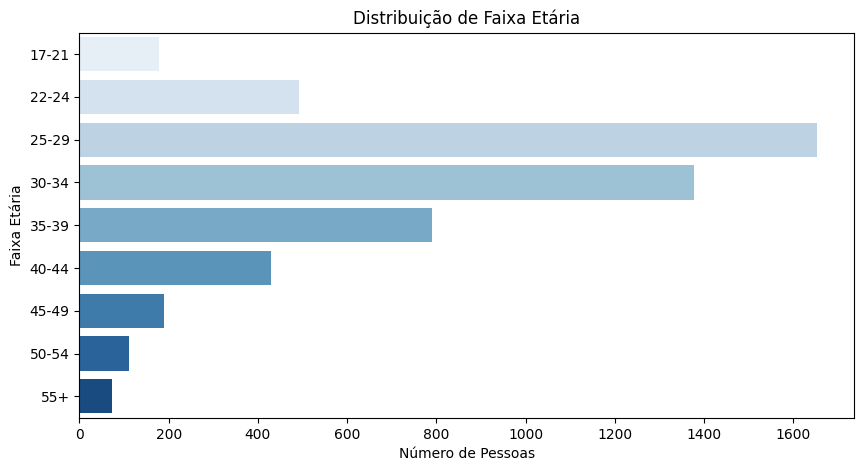

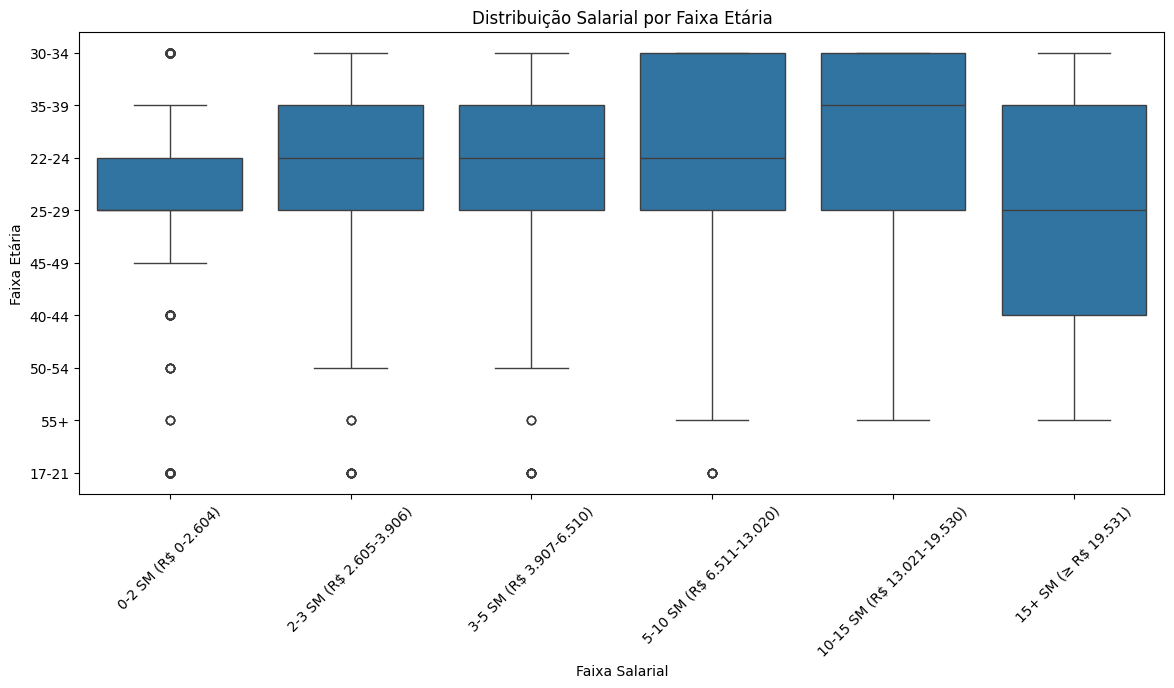


Moda da Faixa Etária: 25-29


/tmp/ipykernel_10132/2101277534.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[coluna_nivel], order=df[coluna_nivel].value_counts().index, palette='Greens')


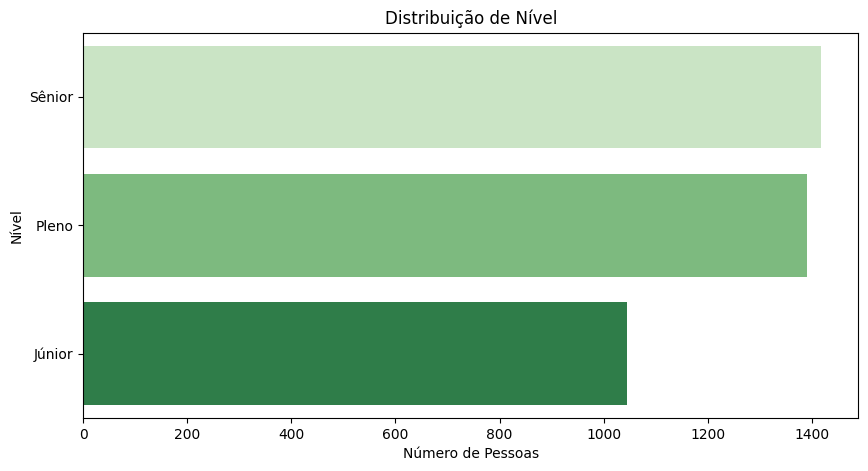

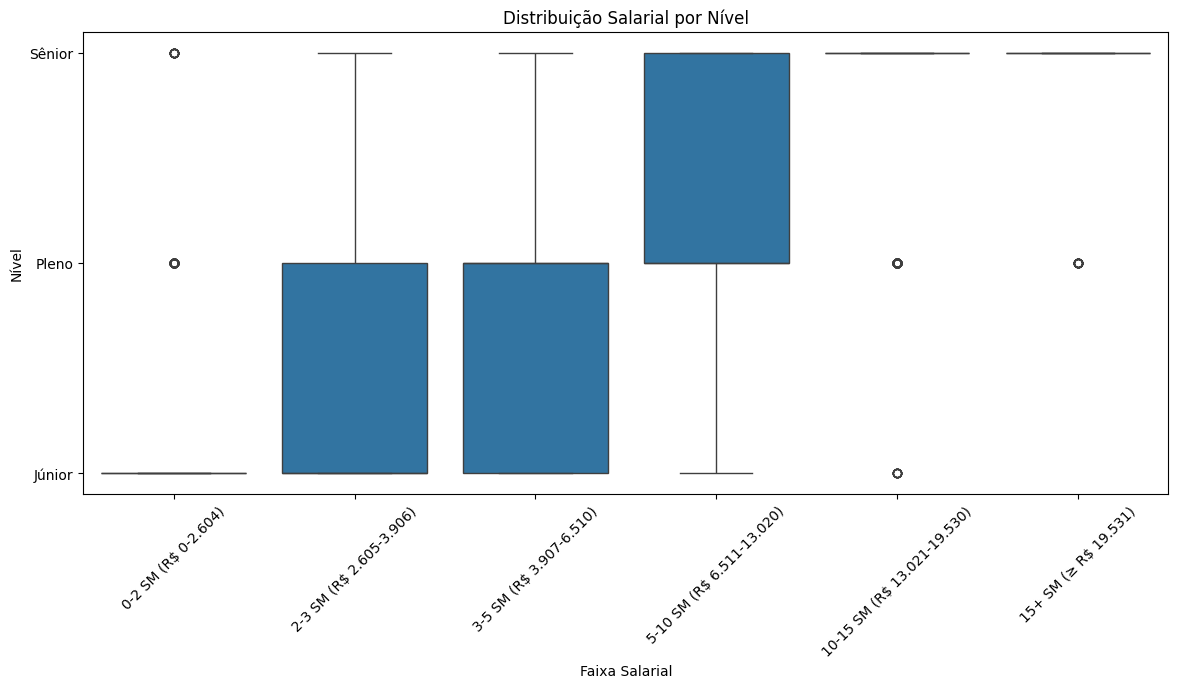


Moda do Nível: Sênior


In [7]:
# Análise Descritiva de Faixa Idade e Nível com foco em Faixa Salarial

import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis
coluna_idade = "('P1_a_1 ', 'Faixa idade')"
coluna_nivel = "('P2_g ', 'Nivel')"
coluna_salarial = "Faixa Salarial" 
ordem_categorias = [
        "0-2 SM (R$ 0-2.604)",
        "2-3 SM (R$ 2.605-3.906)",
        "3-5 SM (R$ 3.907-6.510)",
        "5-10 SM (R$ 6.511-13.020)",
        "10-15 SM (R$ 13.021-19.530)",
        "15+ SM (≥ R$ 19.531)",
        #"Outros"
]
ordem_idade = [
    '17-21',
    '22-24',
    '25-29',
    '30-34',
    '35-39',
    '40-44',
    '45-49',
    '50-54',
    '55+'
]

# ----------------------------------
# 1. Faixa Etária
# ----------------------------------

# Gráfico Univariado - Faixa Idade
plt.figure(figsize=(10,5))
sns.countplot(y=df[coluna_idade], order=ordem_idade, palette='Blues')
plt.title('Distribuição de Faixa Etária')
plt.xlabel('Número de Pessoas')
plt.ylabel('Faixa Etária')
plt.show()

# Gráfico Bivariado - Faixa Idade vs Faixa Salarial
plt.figure(figsize=(14,6))
sns.boxplot(x=coluna_salarial, y=coluna_idade, order=ordem_categorias, data=df)
plt.xticks(rotation=45)
plt.title('Distribuição Salarial por Faixa Etária')
plt.xlabel('Faixa Salarial')
plt.ylabel('Faixa Etária')
plt.show()

# Moda Faixa Idade
print(f"\nModa da Faixa Etária: {df[coluna_idade].mode().values[0]}")

# ----------------------------------
# 2. Nível (Júnior/Pleno/Sênior)
# ----------------------------------

# Gráfico Univariado - Nível
plt.figure(figsize=(10,5))
sns.countplot(y=df[coluna_nivel], order=df[coluna_nivel].value_counts().index, palette='Greens')
plt.title('Distribuição de Nível')
plt.xlabel('Número de Pessoas')
plt.ylabel('Nível')
plt.show()

# Gráfico Bivariado - Nível vs Faixa Salarial
plt.figure(figsize=(14,6))
sns.boxplot(x=coluna_salarial, y=coluna_nivel, order=ordem_categorias,  data=df)
plt.xticks(rotation=45)
plt.title('Distribuição Salarial por Nível')
plt.xlabel('Faixa Salarial')
plt.ylabel('Nível')
plt.show()

# Moda Nível
print(f"\nModa do Nível: {df[coluna_nivel].mode().values[0]}")


## 2.3 Transformação de variáveis

Para a construção do modelo preditivo, foi necessário aplicar transformações em variáveis categóricas e numéricas a fim de adequá-las ao formato requerido pelos algoritmos de machine learning.

### Codificação de Variáveis Categóricas

As variáveis categóricas foram transformadas utilizando a técnica de One-Hot Encoding, que cria colunas binárias (0 ou 1) para cada categoria de uma variável. Essa abordagem evita que o modelo interprete erroneamente relações ordinais entre categorias que não possuem ordem natural. As variáveis codificadas incluem: `Nível`, `Genero`, `Cor/raca/etnia`, `Nivel de Ensino`, `Atualmente qual a sua forma de trabalho?`, `AI Generativa é uma prioridade em sua empresa?`, `Qual sua situação atual de trabalho?`. A codificação foi realizada com a biblioteca `scikit-learn`.

### Padronização de Variáveis Numéricas

A variável Idade, do tipo numérica contínua, foi padronizada utilizando a técnica de Standardization, que transforma os dados para terem média zero e desvio padrão igual a um. Essa técnica é especialmente útil quando se utiliza algoritmos baseados em distância, como regressão logística, SVM ou KNN.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

df["('P2_c ', 'Numero de Funcionarios')"] = df["('P2_c ', 'Numero de Funcionarios')"].fillna('Não informado')

df["('P2_c ', 'Numero de Funcionarios')"] = df["('P2_c ', 'Numero de Funcionarios')"].replace(
    'de 501 a 100', 'de 101 a 500'
)

categorias_ordenadas = [
    'Não informado',  # Para valores que eram nulos
    'de 1 a 5',
    'de 6 a 10',
    'de 11 a 50',
    'de 51 a 100',
    'de 101 a 500',
    'de 501 a 1.000',
    'de 1.001 a 3.000',
    'Acima de 3.000'
]

encoder = OrdinalEncoder(
    categories=[categorias_ordenadas],
    handle_unknown='use_encoded_value',  
    unknown_value=-1  # Valor para categorias desconhecidas
)

df[['Num_Funcionarios_Encoded']] = encoder.fit_transform(
    df[["('P2_c ', 'Numero de Funcionarios')"]]
)

print("Contagem de valores codificados:")
print(df['Num_Funcionarios_Encoded'].value_counts().sort_index())

print("\nMapeamento original para codificado:")
for i, cat in enumerate(categorias_ordenadas):
    print(f"{i} → {cat}")

Contagem de valores codificados:
Num_Funcionarios_Encoded
0.0     540
1.0     124
2.0      89
3.0     348
4.0     326
5.0     824
6.0     445
7.0     520
8.0    2077
Name: count, dtype: int64

Mapeamento original para codificado:
0 → Não informado
1 → de 1 a 5
2 → de 6 a 10
3 → de 11 a 50
4 → de 51 a 100
5 → de 101 a 500
6 → de 501 a 1.000
7 → de 1.001 a 3.000
8 → Acima de 3.000


In [9]:
# 1. Tratar valores nulos
df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] = df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].fillna('Não informado')

# 2. Definir ordem das categorias
categorias_experiencia = [
    'Não tenho experiência na área de dados',
    'Menos de 1 ano',
    'de 1 a 2 anos',
    'de 3 a 4 anos',
    'de 4 a 6 anos',  # Caso exista
    'de 5 a 6 anos',  # Caso exista
    'de 7 a 10 anos',
    'Mais de 10 anos',
    'Não informado'
]

# 3. Aplicar OrdinalEncoder
encoder_exp = OrdinalEncoder(
    categories=[categorias_experiencia],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

df['Experiencia_Encoded'] = encoder_exp.fit_transform(
    df[["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"]]
)
print("Contagem de valores codificados:")
print(df['Experiencia_Encoded'].value_counts().sort_index())

print("\nMapeamento original para codificado:")
for i, cat in enumerate(categorias_experiencia):
    print(f"{i} → {cat}")

Contagem de valores codificados:
Experiencia_Encoded
0.0     162
1.0     476
2.0    1201
3.0    1109
4.0     463
5.0     356
6.0     429
7.0     557
8.0     540
Name: count, dtype: int64

Mapeamento original para codificado:
0 → Não tenho experiência na área de dados
1 → Menos de 1 ano
2 → de 1 a 2 anos
3 → de 3 a 4 anos
4 → de 4 a 6 anos
5 → de 5 a 6 anos
6 → de 7 a 10 anos
7 → Mais de 10 anos
8 → Não informado


In [10]:
# Transformação de variáveis

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# One-hot encoding para cada coluna separadamente
for col in [
    "('P1_b ', 'Genero')", 
    "('P2_g ', 'Nivel')",
    "('P1_b ', 'Genero')",
    "('P1_c ', 'Cor/raca/etnia')",
    "('P1_l ', 'Nivel de Ensino')",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')",
    "('P2_a ', 'Qual sua situação atual de trabalho?')"
]:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]), index=df.index)
    df = pd.concat([df, encoded_df], axis=1)

# Padronização da idade
scaler = StandardScaler()
df['Idade_Padronizado'] = scaler.fit_transform(df[["('P1_a ', 'Idade')"]])

list(df.columns)

["('P0', 'id')",
 "('P1_a ', 'Idade')",
 "('P1_a_1 ', 'Faixa idade')",
 "('P1_b ', 'Genero')",
 "('P1_c ', 'Cor/raca/etnia')",
 "('P1_d ', 'PCD')",
 "('P1_e ', 'experiencia_profissional_prejudicada')",
 "('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')",
 "('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')",
 "('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')",
 "('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')",
 "('P1_f ', 'aspectos_prejudicados')",
 "('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')",
 "('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')",
 "('P1_f_3', 'Aprovação em processos seletivos/entrevistas')",
 "('P1_f_4', 'Oportunidades de progressão de carreira')",
 "('P1_f_5', 'Velocidade de progressão de carreira')",
 "('P1_f_6', 'Nível de cobrança no trabalho/Stress no trabalho')",
 "('P1_f_7', 'Atenção dada diante das minhas opiniões e ideias'

## 2.4 Partição dos Dados

Para avaliar o desempenho do modelo preditivo de forma imparcial, os dados foram particionados em dois conjuntos: **treinamento (80%)** e **validação (20%)**. A separação foi realizada utilizando a função `train_test_split` da biblioteca `scikit-learn`, com **estratificação** baseada na variável-alvo (**Faixa Salarial**) para garantir a preservação da distribuição de classes em ambos os conjuntos.

A estratificação é especialmente importante em cenários com classes desbalanceadas, como no caso das faixas salariais, pois assegura que a diversidade das categorias seja representada proporcionalmente nos dados de treinamento e validação. Isso contribui para que o modelo generalize melhor e evita vieses durante o processo de avaliação.

Após a partição, observou-se que, mesmo com a estratificação, a distribuição das faixas salariais permanecia desbalanceada no conjunto de treinamento. Para mitigar esse problema, foi aplicado um processo de **balanceamento** utilizando a técnica de **oversampling** baseada em síntese de novos exemplos, o **SMOTE** (*Synthetic Minority Over-sampling Technique*), da biblioteca `imblearn`.

O balanceamento foi realizado **apenas no conjunto de treinamento**, de forma a não introduzir vieses artificiais no conjunto de validação. Essa abordagem visa garantir que o modelo tenha igual oportunidade de aprender padrões de todas as faixas salariais, melhorando seu desempenho e promovendo maior equidade nas previsões.

A distribuição das faixas salariais antes e depois do balanceamento é apresentada na tabela a seguir:

| Faixa Salarial                    | Antes do Balanceamento | Depois do Balanceamento |
|:----------------------------------:|:----------------------:|:-----------------------:|
| 0-2 SM (R$0 - 2.604)            | 426                    | 1330                    |
| 2-3 SM (R$2.605 - 3.906)            | 282                    | 1330                    |
| 3-5 SM (R$3.907 - 6.510)            | 596                    | 1330                    |
| 5-10 SM (R$6.511 - 13.020)          | 1330                   | 1330                    |
| 10-15 SM (R$13.021 - 19.530)        | 782                    | 1330                    |
| 15+ SM (≥ R$19.531)                 | 385                    | 1330                    |
| Outros                             | 433                    | 1330                    |


Observa-se que, após o balanceamento, todas as categorias de faixa salarial passaram a ter o mesmo número de amostras no conjunto de treinamento, proporcionando ao modelo uma base de aprendizado mais equitativa.

In [3]:
colunas_desejadas = [
    # Fatores demográficos
    'Idade_Padronizado', 
    "('P1_b ', 'Genero')_Feminino",
    "('P1_b ', 'Genero')_Masculino",
    "('P1_b ', 'Genero')_Outro",
    "('P1_b ', 'Genero')_Prefiro não informar",
    "('P1_c ', 'Cor/raca/etnia')_Amarela",
    "('P1_c ', 'Cor/raca/etnia')_Branca",
    "('P1_c ', 'Cor/raca/etnia')_Indígena",
    "('P1_c ', 'Cor/raca/etnia')_Outra",
    "('P1_c ', 'Cor/raca/etnia')_Parda",
    "('P1_c ', 'Cor/raca/etnia')_Prefiro não informar",
    "('P1_c ', 'Cor/raca/etnia')_Preta",
    "('P1_l ', 'Nivel de Ensino')_Doutorado ou Phd",
    "('P1_l ', 'Nivel de Ensino')_Estudante de Graduação",
    "('P1_l ', 'Nivel de Ensino')_Graduação/Bacharelado",
    "('P1_l ', 'Nivel de Ensino')_Mestrado",
    "('P1_l ', 'Nivel de Ensino')_Não tenho graduação formal",
    "('P1_l ', 'Nivel de Ensino')_Prefiro não informar",
    "('P1_l ', 'Nivel de Ensino')_Pós-graduação",
    
    # Fatores profissionais
    "('P2_g ', 'Nivel')_Júnior",
    "('P2_g ', 'Nivel')_Pleno",
    "('P2_g ', 'Nivel')_Sênior",
    "('P2_g ', 'Nivel')_nan",
    "('P2_d ', 'Gestor?')", 
    "Num_Funcionarios_Encoded", 
    "Experiencia_Encoded",
    
    # Fatores modernos
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_Modelo 100% presencial",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_Modelo 100% remoto",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_Modelo híbrido com dias fixos de trabalho presencial",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_nan",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Mais ou menos... É uma das várias iniciativas que estamos impulsionando, mas não é uma prioridade (iniciativas isoladas e pouco foco).",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Não sei opinar sobre esse assunto.",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Não é uma iniciativa que estamos focando e não tem sido uma prioridade.",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Sim, está entre nossas principais prioridades para os próximos 2-4 anos (com discussões de iniciativas e orçamentos de curto a médio prazo).",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Sim, é nossa principal prioridade como empresa (com foco executivo significativo e alocação de orçamento relevante).",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_nan",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Desempregado e não estou buscando recolocação",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Desempregado, buscando recolocação",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Empreendedor ou Empregado (CNPJ)",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Empregado (CLT)",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Estagiário",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Freelancer",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Prefiro não informar",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Servidor Público",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Somente Estudante (graduação)",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Somente Estudante (pós-graduação)",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Trabalho na área Acadêmica/Pesquisador",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Vivo fora do Brasil e trabalho para empresa de fora do Brasil",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Vivo no Brasil e trabalho remoto para empresa de fora do Brasil",
    "('P4_b_1 ', 'Dados relacionais (estruturados em bancos SQL)')",
    "('P4_b_2 ', 'Dados armazenados em bancos NoSQL')",
    "('P4_b_3 ', 'Imagens')",
    "('P4_b_4 ', 'Textos/Documentos')",
    "('P4_b_5 ', 'Vídeos')",
    "('P4_b_6 ', 'Áudios')",
    "('P4_b_7 ', 'Planilhas')",
    "('P4_b_8 ', 'Dados georeferenciados')",
    "('P8_b_1 ', 'Utilizo modelos de regressão (linear, logística, GLM)')",
    "('P8_b_2 ', 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação')",
    "('P8_b_3 ', 'Desenvolvo sistemas de recomendação (RecSys)')",	
    "('P8_b_4 ', 'Utilizo métodos estatísticos Bayesianos para analisar dados')",
    "('P8_b_5 ', 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados')",
    "('P8_b_6 ', 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados')",	
    "('P8_b_7 ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')",
    "('P8_b_8 ', 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)')",	
    "('P8_b_9 ', 'Realizo previsões através de modelos de Séries Temporais (Time Series)')",
    "('P8_b_10 ', 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)')",
    "('P8_b_11 ', 'Utilizo modelos de Machine Learning para detecção de fraude')",
    "('P8_b_12 ', 'Utilizo métodos de Visão Computacional')",
    "('P8_b_13 ', 'Utilizo modelos de Detecção de Churn')",
    "('P8_b_14 ', 'Utilizo LLM's para solucionar problemas de negócio')",
    "('P7_b_1 ', 'Scripts Python')",
    "('P7_b_2 ', 'SQL & Stored Procedures')",
    "('P7_b_3 ', 'Apache Airflow')",
    "('P7_b_4 ', 'Apache NiFi')",
    "('P7_b_5 ', 'Luigi')",
    "('P7_b_6 ', 'AWS Glue')",
    "('P7_b_7 ', 'Talend')",
    "('P7_b_8 ', 'Pentaho')",
    "('P7_b_9 ', 'Alteryx')",
    "('P7_b_10 ', 'Stitch')",
    "('P7_b_11 ', 'Fivetran')",
    "('P7_b_12 ', 'Google Dataflow')",
    "('P7_b_13 ', 'Oracle Data Integrator')",
    "('P7_b_14 ', 'IBM DataStage')",
    "('P7_b_15 ', 'SAP BW ETL')",
    "('P7_b_16 ', 'SQL Server Integration Services (SSIS)')",
    "('P7_b_17 ', 'SAS Data Integration')",
    "('P7_b_18 ', 'Qlik Sense')",
    "('P7_b_19 ', 'Knime')",
    "('P7_b_20 ', 'Databricks')",
    "('P7_b_21 ', 'Não utilizo ferramentas de ETL')"
]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

X = df[colunas_desejadas].copy()  
y = df['Faixa Salarial']

X = X.fillna(0)

# Divisão dos dados
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Codificação da variável alvo
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
for i, label in enumerate(le.classes_):
    print(f"{i}: {label}")

# 5. Balanceamento com SMOTE
try:
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train_encoded)
except ValueError as e:
    print("Erro no SMOTE:", e)
    print("\nVerifique os tipos de dados das colunas:")
    print(X_train.dtypes)
    raise

# 8. Verificação adicional
print("\nDistribuição das classes no conjunto original:")
print(y.value_counts())

print("\nDistribuição após balanceamento:")
print(pd.Series(y_train_bal).value_counts())

0: 0-2 SM (R$ 0-2.604)
1: 10-15 SM (R$ 13.021-19.530)
2: 15+ SM (≥ R$ 19.531)
3: 2-3 SM (R$ 2.605-3.906)
4: 3-5 SM (R$ 3.907-6.510)
5: 5-10 SM (R$ 6.511-13.020)
6: Outros

Distribuição das classes no conjunto original:
Faixa Salarial
5-10 SM (R$ 6.511-13.020)      1663
10-15 SM (R$ 13.021-19.530)     978
3-5 SM (R$ 3.907-6.510)         745
Outros                          540
0-2 SM (R$ 0-2.604)             534
15+ SM (≥ R$ 19.531)            481
2-3 SM (R$ 2.605-3.906)         352
Name: count, dtype: int64

Distribuição após balanceamento:
1    1330
5    1330
6    1330
4    1330
2    1330
0    1330
3    1330
Name: count, dtype: int64


# 3. Modelagem

### Seleção de Variáveis

Para treinar o modelo, foi realizada uma seleção manual de variáveis com base em três categorias principais: **fatores demográficos**, **fatores profissionais** e **fatores modernos**. A seguir estão as colunas desejadas, agrupadas por tipo:

#### Fatores Demográficos
- Idade_Padronizado
- Gênero (Feminino, Masculino, Outro, Prefiro não informar)
- Cor/Raça/Etnia (Amarela, Branca, Indígena, Outra, Parda, Prefiro não informar, Preta)
- Nível de Ensino (Doutorado ou PhD, Estudante de Graduação, Graduação/Bacharelado, Mestrado, Não tenho graduação formal, Pós-graduação, Prefiro não informar)

#### Fatores Profissionais
- Nível (Júnior, Pleno, Sênior, nan)
- Gestor?
- Número de funcionários (codificado)
- Experiência (codificada)

#### Fatores Modernos
- Forma de trabalho (Presencial, Remoto, Híbrido fixo, Híbrido flexível, nan)
- Prioridade em AI Generativa na empresa (várias categorias, incluindo prioridades altas, médias, baixas, desconhecimento e nan)
- Situação atual de trabalho (empregado CLT, freelancer, estudante, etc.)
- Tipos de dados com os quais trabalha (dados relacionais, NoSQL, imagens, textos, vídeos, etc.)
- Técnicas utilizadas (modelos de regressão, redes neurais, NLP, séries temporais, detecção de churn, LLMs, etc.)
- Ferramentas ETL utilizadas (Apache Airflow, Talend, Databricks, etc.)

Após definir a lista de colunas desejadas, foi feito o seguinte filtro para garantir que somente colunas realmente presentes no conjunto `X_train_bal` fossem utilizadas:


In [12]:
colunas_desejadas = [
    # Fatores demográficos
    'Idade_Padronizado', 
    "('P1_b ', 'Genero')_Feminino",
    "('P1_b ', 'Genero')_Masculino",
    "('P1_b ', 'Genero')_Outro",
    "('P1_b ', 'Genero')_Prefiro não informar",
    "('P1_c ', 'Cor/raca/etnia')_Amarela",
    "('P1_c ', 'Cor/raca/etnia')_Branca",
    "('P1_c ', 'Cor/raca/etnia')_Indígena",
    "('P1_c ', 'Cor/raca/etnia')_Outra",
    "('P1_c ', 'Cor/raca/etnia')_Parda",
    "('P1_c ', 'Cor/raca/etnia')_Prefiro não informar",
    "('P1_c ', 'Cor/raca/etnia')_Preta",
    "('P1_l ', 'Nivel de Ensino')_Doutorado ou Phd",
    "('P1_l ', 'Nivel de Ensino')_Estudante de Graduação",
    "('P1_l ', 'Nivel de Ensino')_Graduação/Bacharelado",
    "('P1_l ', 'Nivel de Ensino')_Mestrado",
    "('P1_l ', 'Nivel de Ensino')_Não tenho graduação formal",
    "('P1_l ', 'Nivel de Ensino')_Prefiro não informar",
    "('P1_l ', 'Nivel de Ensino')_Pós-graduação",
    
    # Fatores profissionais
    "('P2_g ', 'Nivel')_Júnior",
    "('P2_g ', 'Nivel')_Pleno",
    "('P2_g ', 'Nivel')_Sênior",
    "('P2_g ', 'Nivel')_nan",
    "('P2_d ', 'Gestor?')", 
    "Num_Funcionarios_Encoded", 
    "Experiencia_Encoded",
    
    # Fatores modernos
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_Modelo 100% presencial",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_Modelo 100% remoto",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_Modelo híbrido com dias fixos de trabalho presencial",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)",
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')_nan",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Mais ou menos... É uma das várias iniciativas que estamos impulsionando, mas não é uma prioridade (iniciativas isoladas e pouco foco).",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Não sei opinar sobre esse assunto.",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Não é uma iniciativa que estamos focando e não tem sido uma prioridade.",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Sim, está entre nossas principais prioridades para os próximos 2-4 anos (com discussões de iniciativas e orçamentos de curto a médio prazo).",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_Sim, é nossa principal prioridade como empresa (com foco executivo significativo e alocação de orçamento relevante).",
    "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')_nan",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Desempregado e não estou buscando recolocação",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Desempregado, buscando recolocação",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Empreendedor ou Empregado (CNPJ)",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Empregado (CLT)",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Estagiário",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Freelancer",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Prefiro não informar",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Servidor Público",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Somente Estudante (graduação)",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Somente Estudante (pós-graduação)",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Trabalho na área Acadêmica/Pesquisador",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Vivo fora do Brasil e trabalho para empresa de fora do Brasil",
    "('P2_a ', 'Qual sua situação atual de trabalho?')_Vivo no Brasil e trabalho remoto para empresa de fora do Brasil",
    "('P4_b_1 ', 'Dados relacionais (estruturados em bancos SQL)')",
    "('P4_b_2 ', 'Dados armazenados em bancos NoSQL')",
    "('P4_b_3 ', 'Imagens')",
    "('P4_b_4 ', 'Textos/Documentos')",
    "('P4_b_5 ', 'Vídeos')",
    "('P4_b_6 ', 'Áudios')",
    "('P4_b_7 ', 'Planilhas')",
    "('P4_b_8 ', 'Dados georeferenciados')",
    "('P8_b_1 ', 'Utilizo modelos de regressão (linear, logística, GLM)')",
    "('P8_b_2 ', 'Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação')",
    "('P8_b_3 ', 'Desenvolvo sistemas de recomendação (RecSys)')",	
    "('P8_b_4 ', 'Utilizo métodos estatísticos Bayesianos para analisar dados')",
    "('P8_b_5 ', 'Utilizo técnicas de NLP (Natural Language Processing) para análisar dados não-estruturados')",
    "('P8_b_6 ', 'Utilizo métodos estatísticos clássicos (Testes de hipótese, análise multivariada, sobrevivência, dados longitudinais, inferência estatistica) para analisar dados')",	
    "('P8_b_7 ', 'Utilizo cadeias de Markov ou HMM's para realizar análises de dados')",
    "('P8_b_8 ', 'Desenvolvo técnicas de Clusterização (K-means, Spectral, DBScan etc)')",	
    "('P8_b_9 ', 'Realizo previsões através de modelos de Séries Temporais (Time Series)')",
    "('P8_b_10 ', 'Utilizo modelos de Reinforcement Learning (aprendizado por reforço)')",
    "('P8_b_11 ', 'Utilizo modelos de Machine Learning para detecção de fraude')",
    "('P8_b_12 ', 'Utilizo métodos de Visão Computacional')",
    "('P8_b_13 ', 'Utilizo modelos de Detecção de Churn')",
    "('P8_b_14 ', 'Utilizo LLM's para solucionar problemas de negócio')"
    "('P7_b_1 ', 'Scripts Python')",
    "('P7_b_2 ', 'SQL & Stored Procedures')",
    "('P7_b_3 ', 'Apache Airflow')",
    "('P7_b_4 ', 'Apache NiFi')",
    "('P7_b_5 ', 'Luigi')",
    "('P7_b_6 ', 'AWS Glue')",
    "('P7_b_7 ', 'Talend')",
    "('P7_b_8 ', 'Pentaho')",
    "('P7_b_9 ', 'Alteryx')",
    "('P7_b_10 ', 'Stitch')",
    "('P7_b_11 ', 'Fivetran')",
    "('P7_b_12 ', 'Google Dataflow')",
    "('P7_b_13 ', 'Oracle Data Integrator')",
    "('P7_b_14 ', 'IBM DataStage')",
    "('P7_b_15 ', 'SAP BW ETL')",
    "('P7_b_16 ', 'SQL Server Integration Services (SSIS)')",
    "('P7_b_17 ', 'SAS Data Integration')",
    "('P7_b_18 ', 'Qlik Sense')",
    "('P7_b_19 ', 'Knime')",
    "('P7_b_20 ', 'Databricks')",
    "('P7_b_21 ', 'Não utilizo ferramentas de ETL')"

    # Variável alvo 
   # 'Faixa Salarial'
]

colunas_existentes = [col for col in colunas_desejadas if col in X_train_bal.columns]
X_train_selecionado = X_train_bal[colunas_existentes]
X_val_selecionado = X_val[colunas_existentes]


## 3.1 Modelos manualmente definidos

Nesta seção, implementamos e avaliamos diversos modelos de classificação com o objetivo de comparar seu desempenho sobre um mesmo conjunto de dados, devidamente balanceado e padronizado. As abordagens consideradas incluem variações da regressão logística (com diferentes configurações e penalizações), árvore de decisão, random forest, rede neural MLP e o algoritmo XGBoost.

A seguir, apresentamos os resultados obtidos para cada modelo, considerando métricas de desempenho tanto no conjunto de treino quanto no de validação. As avaliações incluem precisão (precision), revocação (recall), medida F1 (f1-score) e acurácia geral. 

---

### Regressão Logística

Foram testadas três variações do modelo de regressão logística: uma configuração básica (com parâmetros padrão), uma versão otimizada com penalização ElasticNet e uma configuração com penalização L2 e solver newton-cg. Todos os modelos apresentaram desempenho similar, com acurácia na validação em torno de 53% a 54%.

A análise das métricas por classe revela que o modelo tem bom desempenho apenas na classe 6. No entanto, as demais classes apresentaram desempenho significativamente inferior, especialmente a classe 3, que obteve f1-score entre 0.29 e 0.30, e a classe 4, com f1-score em torno de 0.30 a 0.34. Esses resultados sugerem que há dificuldade em capturar relações mais complexas no conjunto de dados.


### Árvores de Decisão

O modelo de árvore de decisão apresentou leve melhora em relação à regressão logística, com acurácia de 54,2% no conjunto de validação. Embora tenha apresentado maior equilíbrio entre algumas classes, ainda assim não foi suficiente para superar os modelos mais robustos. A classe 2, por exemplo, teve um f1-score de 0.61, e a classe 6 novamente obteve desempenho perfeito. No entanto, classes como a 3 continuaram com baixo desempenho (f1-score de 0.21), indicando limitações do modelo.

### Random Forest

Random Forest apresentou o melhor desempenho entre os modelos avaliados até o momento, alcançando acurácia de 55,9% na validação. O modelo demonstrou melhor equilíbrio entre precisão e revocação em diversas classes, como a classe 5 (f1-score de 0.57) e a classe 2 (f1-score de 0.59). A classe 6 manteve-se com desempenho perfeito, enquanto a classe 3, embora ainda com desempenho ruim (f1-score de 0.26), apresentou leve melhoria frente aos modelos anteriores.

### Perceptron Multicamadas (MLP)

O MLP foi o modelo com melhor desempenho no conjunto de treino, alcançando uma acurácia de 99,5% e métricas F1 próximas de 1 em todas as classes — um claro indicativo de overfitting. No entanto, no conjunto de validação, seu desempenho caiu para uma acurácia de 52,6%, com desempenho especialmente fraco nas classes 1, 3 e 4. Isso revela que, embora o modelo consiga memorizar bem os dados de treino, ele falha ao generalizar para novos exemplos, sendo sensível à complexidade do conjunto.

### XGBoost

O XGBoost apresentou ótimo desempenho no conjunto de treino, com acurácia de 88,4%, destacando-se por resultados equilibrados em praticamente todas as classes. No conjunto de validação, foi o modelo com melhor desempenho geral, alcançando acurácia de 59,4%. Conseguiu manter uma performance estável nas classes mais difíceis (como 2 e 5). Ainda assim, a classe 3 continua sendo uma das mais desafiadoras para todos os modelos avaliados.


In [13]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1.0, max_iter=1000)

modelo_lr_otimizado = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    C=10,
    max_iter=500,
    random_state=42
)

modelo_lr_otimizado2 = LogisticRegression(
    multi_class='multinomial',
    solver='newton-cg',
    C=10,
    max_iter=1000,
    random_state=42
)

from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=42)

from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)

from xgboost import XGBClassifier
modelo_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

from sklearn.neural_network import MLPClassifier
modelo_mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=300, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Função de avaliação de modelos
def avaliar_modelo(modelo, X_train, y_train, X_val, y_val):
    y_pred_train = modelo.predict(X_train)
    y_pred_val = modelo.predict(X_val)
    
    print("\nDesempenho no Treino:")
    print(classification_report(y_train, y_pred_train))
    print("Acurácia:", accuracy_score(y_train, y_pred_train))
    
    print("\nDesempenho na Validação:")
    print(classification_report(y_val, y_pred_val))
    print("Acurácia:", accuracy_score(y_val, y_pred_val))
    
    return y_pred_train, y_pred_val

# Garantir uso apenas de colunas presentes nos dois conjuntos
colunas_existentes = [col for col in colunas_desejadas if col in X_train_bal.columns and col in X_val.columns]

# Padronização para modelos que requerem dados escalados (ex: regressão logística, MLP)
scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal[colunas_existentes])
X_val_scaled = scaler.transform(X_val[colunas_existentes])

# === 1. Modelo de Regressão Logística Básico ===
modelo_lr = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs', 
    max_iter=1000,
    random_state=42
)
modelo_lr.fit(X_train_bal_scaled, y_train_bal)
print("\n=== Modelo LR Básico ===")
y_pred_train_lr, y_pred_val_lr = avaliar_modelo(
    modelo_lr,
    X_train_bal_scaled, y_train_bal,
    X_val_scaled, y_val_encoded
)

# === 2. Modelo de Regressão Logística com Regularização ElasticNet ===
modelo_lr_otimizado = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    penalty='elasticnet',
    l1_ratio=0.5,
    C=0.1,
    max_iter=2000,
    random_state=42
)
modelo_lr_otimizado.fit(X_train_bal_scaled, y_train_bal)

print("\n=== Modelo LR Otimizado (ElasticNet) ===")
y_pred_train_opt, y_pred_val_opt = avaliar_modelo(
    modelo_lr_otimizado,
    X_train_bal_scaled, y_train_bal,
    X_val_scaled, y_val_encoded
)

# === 3. Modelo de Regressão Logística com Newton-CG e L2 ===
modelo_lr_otimizado2 = LogisticRegression(
    multi_class='multinomial',
    solver='newton-cg',
    penalty='l2',
    C=1.0,
    max_iter=1000,
    random_state=42
)
modelo_lr_otimizado2.fit(X_train_bal_scaled, y_train_bal)

print("\n=== Modelo LR Otimizado 2 (L2 - Newton-CG) ===")
y_pred_train_opt2, y_pred_val_opt2 = avaliar_modelo(
    modelo_lr_otimizado2,
    X_train_bal_scaled, y_train_bal,
    X_val_scaled, y_val_encoded
)

# === 4. Modelo Árvore de Decisão ===
modelo_tree.fit(X_train_bal[colunas_existentes], y_train_bal)
print("\n=== Modelo Árvore de Decisão ===")
avaliar_modelo(
    modelo_tree,
    X_train_bal[colunas_existentes], y_train_bal,
    X_val[colunas_existentes], y_val_encoded  
)

modelo_rf.fit(X_train_bal[colunas_existentes], y_train_bal)
print("\n=== Modelo Floresta Aleatória ===")
avaliar_modelo(
    modelo_rf,
    X_train_bal[colunas_existentes], y_train_bal,
    X_val[colunas_existentes], y_val_encoded  
)

modelo_mlp.fit(X_train_bal[colunas_existentes], y_train_bal)
print("\n=== Modelo MLP ===")
avaliar_modelo(
    modelo_mlp,
    X_train_bal[colunas_existentes], y_train_bal,
    X_val[colunas_existentes], y_val_encoded  
)


# 1. Corrigir nomes de colunas se forem MultiIndex
if isinstance(X_train_bal.columns, pd.MultiIndex):
    X_train_bal.columns = ['_'.join(map(str, col)).strip() for col in X_train_bal.columns]
    X_val.columns = ['_'.join(map(str, col)).strip() for col in X_val.columns]

# 2. Remover colunas duplicadas
X_train_bal = X_train_bal.loc[:, ~X_train_bal.columns.duplicated()]
X_val = X_val.loc[:, ~X_val.columns.duplicated()]


modelo_xgb.fit(X_train_bal[colunas_existentes], y_train_bal)
print("\n=== Modelo XGBoost ===")
avaliar_modelo(
    modelo_xgb,
    X_train_bal[colunas_existentes], y_train_bal,
    X_val[colunas_existentes], y_val_encoded
)


/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Modelo LR Básico ===

Desempenho no Treino:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1330
           1       0.58      0.56      0.57      1330
           2       0.69      0.77      0.73      1330
           3       0.51      0.56      0.53      1330
           4       0.48      0.44      0.46      1330
           5       0.50      0.48      0.49      1330
           6       1.00      1.00      1.00      1330

    accuracy                           0.65      9310
   macro avg       0.65      0.65      0.65      9310
weighted avg       0.65      0.65      0.65      9310

Acurácia: 0.6510204081632653

Desempenho na Validação:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       107
           1       0.52      0.51      0.51       196
           2       0.51      0.78      0.62        96
           3       0.24      0.41      0.30        70
           4       0.31     

/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Modelo LR Otimizado (ElasticNet) ===

Desempenho no Treino:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1330
           1       0.57      0.56      0.56      1330
           2       0.69      0.77      0.72      1330
           3       0.50      0.55      0.52      1330
           4       0.49      0.45      0.47      1330
           5       0.50      0.47      0.48      1330
           6       1.00      1.00      1.00      1330

    accuracy                           0.65      9310
   macro avg       0.65      0.65      0.65      9310
weighted avg       0.65      0.65      0.65      9310

Acurácia: 0.6483351235230934

Desempenho na Validação:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       107
           1       0.51      0.50      0.51       196
           2       0.50      0.78      0.61        96
           3       0.23      0.40      0.29        70
           4

/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Modelo LR Otimizado 2 (L2 - Newton-CG) ===

Desempenho no Treino:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1330
           1       0.58      0.56      0.57      1330
           2       0.69      0.77      0.73      1330
           3       0.51      0.56      0.53      1330
           4       0.49      0.44      0.46      1330
           5       0.50      0.48      0.49      1330
           6       1.00      1.00      1.00      1330

    accuracy                           0.65      9310
   macro avg       0.65      0.65      0.65      9310
weighted avg       0.65      0.65      0.65      9310

Acurácia: 0.6515574650912996

Desempenho na Validação:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       107
           1       0.52      0.51      0.51       196
           2       0.51      0.78      0.62        96
           3       0.24      0.41      0.30        70
      

/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:12:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Modelo XGBoost ===

Desempenho no Treino:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1330
           1       0.82      0.80      0.81      1330
           2       0.89      0.92      0.91      1330
           3       0.90      0.89      0.89      1330
           4       0.86      0.83      0.84      1330
           5       0.77      0.81      0.79      1330
           6       1.00      1.00      1.00      1330

    accuracy                           0.88      9310
   macro avg       0.88      0.88      0.88      9310
weighted avg       0.88      0.88      0.88      9310

Acurácia: 0.8839957035445757

Desempenho na Validação:
              precision    recall  f1-score   support

           0       0.68      0.56      0.62       107
           1       0.56      0.52      0.54       196
           2       0.66      0.71      0.68        96
           3       0.30      0.23      0.26        70
           4       0.36      0

(array([1, 5, 6, ..., 6, 6, 6], shape=(9310,)),
 array([2, 4, 5, ..., 0, 5, 2], shape=(1059,)))

## 3.2 Modelos otimizados
###  Melhores parâmetros — Modelos otimamente definidos

Modelos resultantes de um processo de otimização de hiperparâmetros:

#### 1. **Regressão Logística (Multinomial)**
- **Melhor F1-score:** 0.6333  
- **Melhores parâmetros:**  
  ```python
  {
      'C': np.float64(3.144559810763267),
      'class_weight': 'balanced',
      'max_iter': 1857,
      'solver': 'lbfgs'
  }
  ```

#### 2. **Regressão Logística (ElasticNet)**
- **Melhor F1-score:** 0.6337  
- **Melhores parâmetros:**  
  ```python
  {
      'C': np.float64(0.20684494295802447),
      'class_weight': 'balanced',
      'l1_ratio': np.float64(0.7219987722668247),
      'max_iter': 2933,
      'solver': 'saga'
  }
  ```

#### 3. **Árvore de Decisão**
- **Melhor F1-score:** 0.7185  
- **Melhores parâmetros:**  
  ```python
  {
      'class_weight': 'balanced',
      'criterion': 'gini',
      'max_depth': 29,
      'min_samples_leaf': 1,
      'min_samples_split': 2
  }
  ```

#### 4. **Floresta Aleatória**
- **Melhor F1-score:** 0.8244  
- **Melhores parâmetros:**  
  ```python
  {
      'bootstrap': False,
      'class_weight': None,
      'max_depth': 22,
      'min_samples_leaf': 1,
      'min_samples_split': 5,
      'n_estimators': 445
  }
  ```

#### 5. **MLP (Multi-Layer Perceptron)**
- **Melhor F1-score:** 0.7870  
- **Melhores parâmetros:**  
  ```python
  {
      'activation': 'relu',
      'alpha': np.float64(0.014192422497476265),
      'early_stopping': True,
      'hidden_layer_sizes': (50, 50),
      'learning_rate': 'constant',
      'learning_rate_init': np.float64(0.008455064367977083),
      'max_iter': 720
  }
  ```

#### 6. **XGBoost**
- **Melhor F1-score:** 0.8088  
- **Melhores parâmetros:**  
  ```python
  {
      'n_estimators': 384,
      'max_depth': 10,
      'learning_rate': 0.06197449123689254,
      'subsample': 0.7081033565654226,
      'colsample_bytree': 0.9902423490955866,
      'gamma': 0.039425767808392645,
      'reg_alpha': 0.18418936375758244,
      'reg_lambda': 0.9203732256490574,
      'min_child_weight': 2
  }
  ```


In [301]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import make_scorer, f1_score

# Configurações comuns
cv = 5
n_jobs = -1
random_state = 42
scoring = make_scorer(f1_score, average='weighted')

# Função para executar e mostrar resultados da otimização
def run_optimization(model, params, X, y, search_type='random', n_iter=50):
    if search_type == 'random':
        search = RandomizedSearchCV(
            estimator=model,
            param_distributions=params,
            n_iter=n_iter,
            cv=cv,
            scoring=scoring,
            n_jobs=n_jobs,
            verbose=2,
            random_state=random_state
        )
    elif search_type == 'grid':
        search = GridSearchCV(
            estimator=model,
            param_grid=params,
            cv=cv,
            scoring=scoring,
            n_jobs=n_jobs,
            verbose=2
        )
    
    search.fit(X, y)
    print(f"\nMelhores parâmetros: {search.best_params_}")
    print(f"Melhor F1-score: {search.best_score_:.4f}")
    return search.best_estimator_

### Otimização para Regressão Logística

#### LR Básico Otimizado

In [ ]:
lr_params = {
    'C': uniform(0.001, 10),
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'max_iter': randint(100, 2000),
    'class_weight': [None, 'balanced']
}

# Otimização
best_lr = run_optimization(
    LogisticRegression(random_state=random_state),
    lr_params,
    X_train_bal_scaled,
    y_train_bal
)

#### LR ElasticNet Otimizado

In [ ]:
en_params = {
    'C': uniform(0.001, 10),
    'l1_ratio': uniform(0, 1),
    'solver': ['saga'],
    'max_iter': randint(500, 3000),
    'class_weight': [None, 'balanced']
}

best_en = run_optimization(
    LogisticRegression(
        multi_class='multinomial',
        penalty='elasticnet',
        random_state=random_state
    ),
    en_params,
    X_train_bal_scaled,
    y_train_bal
)

#### Otimização para Árvore de Decisão

In [304]:
from sklearn.tree import DecisionTreeClassifier

# Espaço de parâmetros
tree_params = {
    'max_depth': [None] + list(range(3, 30)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Otimização
best_tree = run_optimization(
    DecisionTreeClassifier(random_state=random_state),
    tree_params,
    X_train_bal[colunas_existentes],
    y_train_bal,
    n_iter=100
)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END class_weight=None, criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END class_weight=None, criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END class_weight=None, criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END class_weight=None, criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END class_weight=None, criterion=entropy, max_depth=16, min_samples_leaf=8, min_samples_split=8; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=24, min_samples_leaf=8, min_samples_split=5; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=24, min_samples_leaf=8, min_samples_split=5; total time=   0.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=24, min_samples_leaf=8, min_sa

#### Otimização para Floresta Aleatória

In [305]:
from sklearn.ensemble import RandomForestClassifier

# Espaço de parâmetros
rf_params = {
    'n_estimators': randint(50, 500),
    'max_depth': [None] + list(range(5, 30)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Otimização
best_rf = run_optimization(
    RandomForestClassifier(random_state=random_state),
    rf_params,
    X_train_bal[colunas_existentes],
    y_train_bal,
    n_iter=100
)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, class_weight=None, max_depth=18, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   1.2s
[CV] END bootstrap=True, class_weight=None, max_depth=18, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   1.3s
[CV] END bootstrap=True, class_weight=None, max_depth=18, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   1.2s
[CV] END bootstrap=True, class_weight=None, max_depth=18, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   1.3s
[CV] END bootstrap=True, class_weight=None, max_depth=18, min_samples_leaf=8, min_samples_split=8, n_estimators=171; total time=   1.3s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=14, min_samples_leaf=8, min_samples_split=5, n_estimators=409; total time=   3.4s
[CV] END bootstrap=True, class_weight=balanced_subsample, max_depth=14, min_samples_leaf=8, min_samples_spl

#### Otimização para MLP (Rede Neural)

In [306]:
from sklearn.neural_network import MLPClassifier

# Espaço de parâmetros
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': uniform(0.0001, 0.1),
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': uniform(0.001, 0.1),
    'max_iter': randint(200, 1000),
    'early_stopping': [True]
}

# Otimização
best_mlp = run_optimization(
    MLPClassifier(random_state=random_state),
    mlp_params,
    X_train_bal[colunas_existentes],
    y_train_bal,
    n_iter=50
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END activation=logistic, alpha=0.0797542986860233, early_stopping=True, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.07896910002727693, max_iter=220; total time=   0.6s
[CV] END activation=logistic, alpha=0.04468327528535912, early_stopping=True, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.04692488919658672, max_iter=572; total time=   0.9s
[CV] END activation=logistic, alpha=0.0797542986860233, early_stopping=True, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.07896910002727693, max_iter=220; total time=   0.9s
[CV] END activation=logistic, alpha=0.0797542986860233, early_stopping=True, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.07896910002727693, max_iter=220; total time=   1.1s
[CV] END activation=logistic, alpha=0.0797542986860233, early_stopping=True, hidden_layer_sizes=(50, 50), learning_rate=const

#### Otimização para XGBoost (Otimização Bayesiana)

In [307]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import optuna
from optuna.samplers import TPESampler

def xgb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss'
    }
    
    model = XGBClassifier(**params, random_state=random_state)
    scores = cross_val_score(
        model, 
        X_train_bal[colunas_existentes], 
        y_train_bal, 
        cv=cv, 
        scoring=scoring,
        n_jobs=n_jobs
    )
    return scores.mean()

# Estudo de otimização
study = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=random_state)
)
study.optimize(xgb_objective, n_trials=100)

# Melhor modelo
best_xgb = XGBClassifier(**study.best_params, random_state=random_state)
best_xgb.fit(X_train_bal[colunas_existentes], y_train_bal)


[I 2025-04-29 04:59:22,306] A new study created in memory with name: no-name-24f85aab-202f-43d8-abf9-1864770783e2
/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:59:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:59:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [04:59:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9879161352238662, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.01760267972561056, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06009218242571642,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=264, n_jobs=None,
              num_parallel_tree=None, ...)

In [319]:

# === Modelo 1: Regressão Logística Otimizada (L2) ===
best_lr1 = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    penalty='l2',
    class_weight='balanced',
    C=np.float64(3.144559810763267),
    max_iter=1857,
    random_state=42
)
best_lr1.fit(X_train_bal_scaled, y_train_bal)
print("\n=== Modelo LR (L2 - Otimizado) ===")
avaliar_modelo(best_lr1, X_train_bal_scaled, y_train_bal, X_val_scaled, y_val_encoded)

# === Modelo 2: Regressão Logística com ElasticNet ===
best_lr2 = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    penalty='elasticnet',
    class_weight='balanced',
    C=np.float64(0.20684494295802447),
    l1_ratio=np.float64(0.7219987722668247),
    max_iter=2933,
    random_state=42
)
best_lr2.fit(X_train_bal_scaled, y_train_bal)
print("\n=== Modelo LR (ElasticNet Otimizado) ===")
avaliar_modelo(best_lr2, X_train_bal_scaled, y_train_bal, X_val_scaled, y_val_encoded)

# === Modelo 3: Árvore de Decisão Otimizada ===
best_tree = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=29,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train_bal[colunas_existentes], y_train_bal)
print("\n=== Modelo Árvore de Decisão ===")
avaliar_modelo(best_tree, X_train_bal[colunas_existentes], y_train_bal, X_val[colunas_existentes], y_val_encoded)

# === Modelo 4: Floresta Aleatória Otimizada ===
best_rf = RandomForestClassifier(
    bootstrap=False,
    class_weight=None,
    max_depth=22,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=445,
    random_state=42
)
best_rf.fit(X_train_bal[colunas_existentes], y_train_bal)
print("\n=== Modelo Floresta Aleatória ===")
avaliar_modelo(best_rf, X_train_bal[colunas_existentes], y_train_bal, X_val[colunas_existentes], y_val_encoded)

# === Modelo 5: MLP Otimizado ===
best_mlp = MLPClassifier(
    activation='relu',
    alpha=np.float64(0.014192422497476265),
    early_stopping=False,
    hidden_layer_sizes=(50, 50),
    learning_rate='constant',
    learning_rate_init=np.float64(0.008455064367977083),
    max_iter=720,
    random_state=42
)
best_mlp.fit(X_train_bal_scaled, y_train_bal)
print("\n=== Modelo MLP ===")
avaliar_modelo(best_mlp, X_train_bal_scaled, y_train_bal, X_val_scaled, y_val_encoded)

# === Modelo 6: XGBoost Otimizado ===
best_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=384,
    max_depth=10,
    learning_rate=0.06197449123689254,
    subsample=0.7081033565654226,
    colsample_bytree=0.9902423490955866,
    gamma=0.039425767808392645,
    reg_alpha=0.18418936375758244,
    reg_lambda=0.9203732256490574,
    min_child_weight=2,
    random_state=42
)
best_xgb.fit(X_train_bal[colunas_existentes], y_train_bal)
print("\n=== Modelo XGBoost ===")
avaliar_modelo(best_xgb, X_train_bal[colunas_existentes], y_train_bal, X_val[colunas_existentes], y_val_encoded)



=== Modelo LR (L2 - Otimizado) ===

Desempenho no Treino:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1330
           1       0.58      0.56      0.57      1330
           2       0.69      0.77      0.73      1330
           3       0.51      0.56      0.53      1330
           4       0.48      0.44      0.46      1330
           5       0.50      0.48      0.49      1330
           6       1.00      1.00      1.00      1330

    accuracy                           0.65      9310
   macro avg       0.65      0.65      0.65      9310
weighted avg       0.65      0.65      0.65      9310

Acurácia: 0.6510204081632653

Desempenho na Validação:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       107
           1       0.52      0.49      0.51       196
           2       0.51      0.78      0.61        96
           3       0.23      0.39      0.28        70
           4      

/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:03:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Modelo XGBoost ===

Desempenho no Treino:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1330
           1       1.00      0.99      1.00      1330
           2       1.00      1.00      1.00      1330
           3       1.00      1.00      1.00      1330
           4       1.00      1.00      1.00      1330
           5       0.99      0.99      0.99      1330
           6       1.00      1.00      1.00      1330

    accuracy                           1.00      9310
   macro avg       1.00      1.00      1.00      9310
weighted avg       1.00      1.00      1.00      9310

Acurácia: 0.9972073039742213

Desempenho na Validação:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       107
           1       0.54      0.48      0.51       196
           2       0.59      0.57      0.58        96
           3       0.33      0.20      0.25        70
           4       0.39      0

(array([1, 5, 6, ..., 6, 6, 6], shape=(9310,)),
 array([2, 0, 5, ..., 0, 5, 2], shape=(1059,)))

### 3.3. Medidas de Desempenho (R², MAE, RMSE)

Foram comparadas versões antigas e novas de diferentes modelos de regressão e classificação, com foco no desempenho em **treinamento** e **validação**. As métricas utilizadas foram:

- **R² (Coeficiente de Determinação):** quanto maior, melhor a explicação da variabilidade dos dados.
- **MAE (Erro Absoluto Médio):** média dos erros absolutos, idealmente o menor possível.
- **RMSE (Raiz do Erro Quadrático Médio):** penaliza mais os erros grandes, complementando a análise do MAE.

---

#### Regressão Logística (Padrão vs Otimizado)
- **Desempenho semelhante entre versões.**
- R² baixo (~0.14 na validação), indicando pouca capacidade explicativa.
- MAE e RMSE altos na validação mostram previsões imprecisas.
- **Indicado como baseline, mas limitado.**

---

#### Regressão Logística com ElasticNet
- Modelo otimizado levemente superior no treino (menor erro).
- Validação manteve R² em torno de 0.14, com leve aumento de erro na versão otimizada.
- **ElasticNet não trouxe ganho significativo.**

---

#### Árvore de Decisão
- R² quase perfeito no treino (> 0.99), mas negativo na validação.
- Diferença extrema revela **forte overfitting**.
- **Modelo memoriza o treino e generaliza mal.**

---

#### Random Forest
- Excelente desempenho no treino (R² ~ 0.97).
- Validação razoável (R² ~ 0.12), melhor que os modelos lineares.
- Boa alternativa com menos overfitting que a árvore de decisão.
- **Bom equilíbrio.**

---

#### XGBoost
- Desempenho muito próximo de Random Forest.
- Treinamento com R² alto (> 0.99), validação estável (~0.14).
- MAE e RMSE decentes.
- **Modelo mais robusto com bom desempenho.**

---

#### MLP (Perceptron Multicamadas)
- Excelente desempenho no treino antigo (R² ~ 0.76), mas nova versão falhou completamente (R² negativo, MAE > 2).
- Validação ruim em ambas, especialmente na nova versão.
- **Modelo instável e sensível.**

---

### Conclusão Geral

- **Modelos de árvore (Random Forest e XGBoost)** se destacaram com bom desempenho e generalização aceitável, mesmo com algum overfitting.
- **Modelos lineares (Regressões)** são estáveis, mas pouco eficazes para capturar a complexidade dos dados.
- **MLP** apresentou problemas de treinamento.

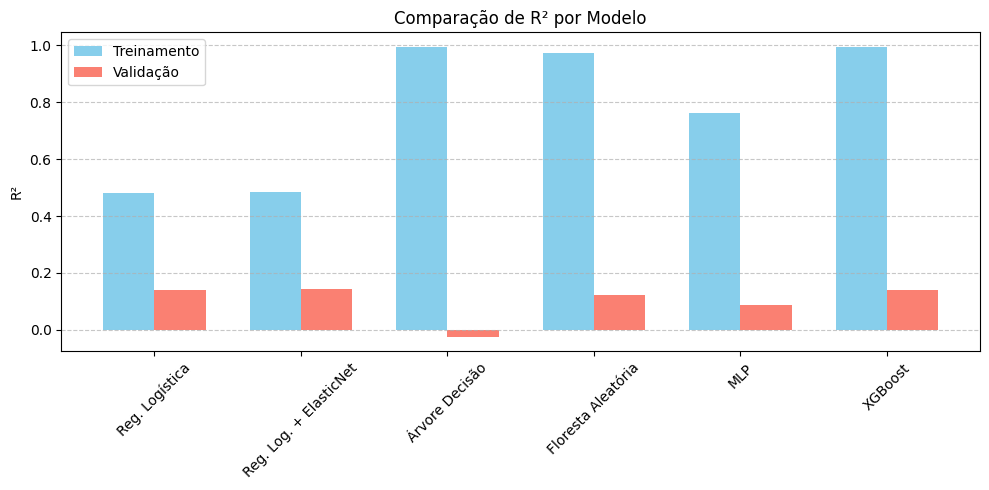

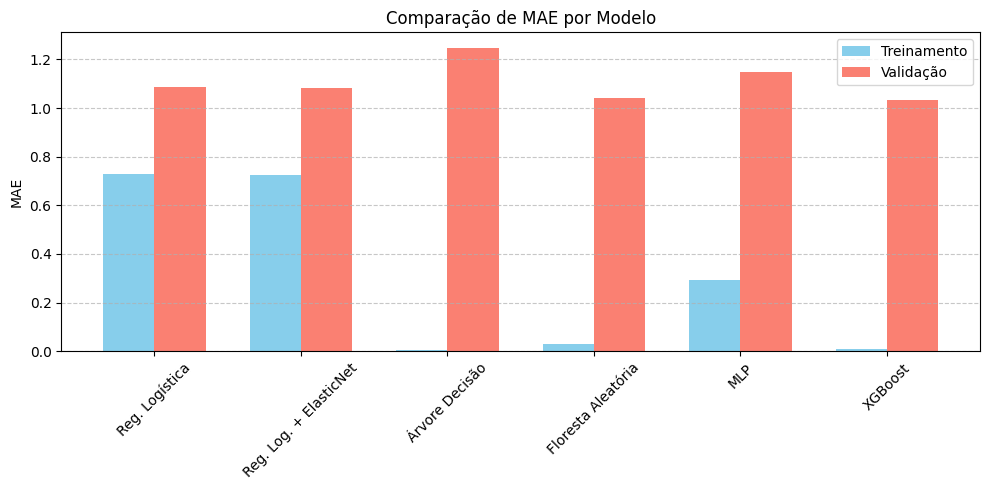

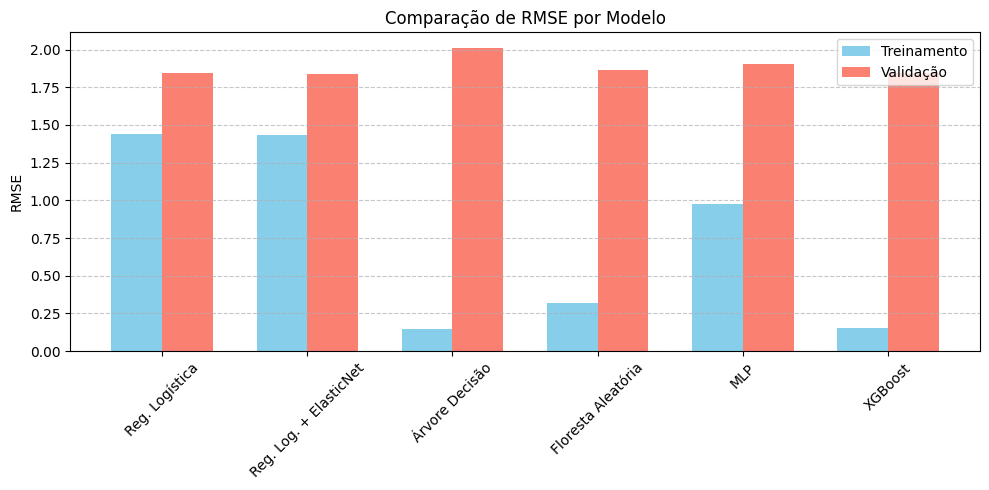

In [320]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para os gráficos
modelos = [
    "Reg. Logística", "Reg. Log. + ElasticNet", "Árvore Decisão",
    "Floresta Aleatória", "MLP", "XGBoost"
]

# R² treino e validação
r2_treino = [0.4810, 0.4850, 0.9944, 0.9742, 0.7623, 0.9942]
r2_val = [0.1405, 0.1453, -0.0238, 0.1238, 0.0873, 0.1400]

# MAE treino e validação
mae_treino = [0.7278, 0.7257, 0.0062, 0.0300, 0.2921, 0.0071]
mae_val = [1.0859, 1.0822, 1.2493, 1.0406, 1.1473, 1.0331]

# RMSE treino e validação
rmse_treino = [1.4408, 1.4352, 0.1495, 0.3209, 0.9750, 0.1523]
rmse_val = [1.8448, 1.8397, 2.0134, 1.8626, 1.9010, 1.8453]

# Função para plotar gráficos comparativos
def plot_comparativo(metric_name, treino, val):
    x = np.arange(len(modelos))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    bars1 = ax.bar(x - width/2, treino, width, label='Treinamento', color='skyblue')
    bars2 = ax.bar(x + width/2, val, width, label='Validação', color='salmon')

    ax.set_ylabel(metric_name)
    ax.set_title(f'Comparação de {metric_name} por Modelo')
    ax.set_xticks(x)
    ax.set_xticklabels(modelos, rotation=45)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Gerar os três gráficos
plot_comparativo("R²", r2_treino, r2_val)
plot_comparativo("MAE", mae_treino, mae_val)
plot_comparativo("RMSE", rmse_treino, rmse_val)


In [317]:
# Função de comparação de modelos com métricas de regressão
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def comparar_modelos_regressao(nome_modelo, modelo_antigo, modelo_novo, X_train, y_train, X_val, y_val):
    def get_metrics(modelo, X_tr, y_tr, X_v, y_v):
        y_pred_tr = modelo.predict(X_tr)
        y_pred_v = modelo.predict(X_v)
        return {
            "train": {
                "r2": r2_score(y_tr, y_pred_tr),
                "mae": mean_absolute_error(y_tr, y_pred_tr),
                "rmse": np.sqrt(mean_squared_error(y_tr, y_pred_tr)),
            },
            "val": {
                "r2": r2_score(y_v, y_pred_v),
                "mae": mean_absolute_error(y_v, y_pred_v),
                "rmse": np.sqrt(mean_squared_error(y_v, y_pred_v)),
            }
        }

    res_antigo = get_metrics(modelo_antigo, X_train, y_train, X_val, y_val)
    res_novo = get_metrics(modelo_novo, X_train, y_train, X_val, y_val)

    print(f"\n=== Comparação: {nome_modelo} ===")
    
    print("\n--- Treinamento ---")
    print(f"Antigo -> R²: {res_antigo['train']['r2']:.4f}, MAE: {res_antigo['train']['mae']:.4f}, RMSE: {res_antigo['train']['rmse']:.4f}")
    print(f"Novo   -> R²: {res_novo['train']['r2']:.4f}, MAE: {res_novo['train']['mae']:.4f}, RMSE: {res_novo['train']['rmse']:.4f}")
    
    print("\n--- Validação ---")
    print(f"Antigo -> R²: {res_antigo['val']['r2']:.4f}, MAE: {res_antigo['val']['mae']:.4f}, RMSE: {res_antigo['val']['rmse']:.4f}")
    print(f"Novo   -> R²: {res_novo['val']['r2']:.4f}, MAE: {res_novo['val']['mae']:.4f}, RMSE: {res_novo['val']['rmse']:.4f}")

# Comparações
comparar_modelos_regressao(
    "Regressão Logística (Padrão vs Otimizado)",
    modelo_lr,
    best_lr1,
    X_train_bal_scaled,
    y_train_bal,
    X_val_scaled,
    y_val_encoded
)

comparar_modelos_regressao(
    "Regressão Logística com ElasticNet",
    modelo_lr_otimizado,
    best_lr2,
    X_train_bal_scaled,
    y_train_bal,
    X_val_scaled,
    y_val_encoded
)

comparar_modelos_regressao(
    "Árvore de Decisão",
    modelo_tree,
    best_tree,
    X_train_bal[colunas_existentes],
    y_train_bal,
    X_val[colunas_existentes],
    y_val_encoded
)

comparar_modelos_regressao(
    "Floresta Aleatória",
    modelo_rf,
    best_rf,
    X_train_bal[colunas_existentes],
    y_train_bal,
    X_val[colunas_existentes],
    y_val_encoded
)

comparar_modelos_regressao(
    "MLP (Perceptron Multicamadas)",
    modelo_mlp,
    best_mlp,
    X_train_bal[colunas_existentes],
    y_train_bal,
    X_val[colunas_existentes],
    y_val_encoded
)

comparar_modelos_regressao(
    "XGBoost",
    modelo_xgb,
    best_xgb,
    X_train_bal[colunas_existentes],
    y_train_bal,
    X_val[colunas_existentes],
    y_val_encoded
)



=== Comparação: Regressão Logística (Padrão vs Otimizado) ===

--- Treinamento ---
Antigo -> R²: 0.4810, MAE: 0.7278, RMSE: 1.4408
Novo   -> R²: 0.4796, MAE: 0.7294, RMSE: 1.4428

--- Validação ---
Antigo -> R²: 0.1405, MAE: 1.0859, RMSE: 1.8448
Novo   -> R²: 0.1405, MAE: 1.0859, RMSE: 1.8448

=== Comparação: Regressão Logística com ElasticNet ===

--- Treinamento ---
Antigo -> R²: 0.4803, MAE: 0.7329, RMSE: 1.4419
Novo   -> R²: 0.4850, MAE: 0.7257, RMSE: 1.4352

--- Validação ---
Antigo -> R²: 0.1469, MAE: 1.0793, RMSE: 1.8379
Novo   -> R²: 0.1453, MAE: 1.0822, RMSE: 1.8397

=== Comparação: Árvore de Decisão ===

--- Treinamento ---
Antigo -> R²: 0.9944, MAE: 0.0062, RMSE: 0.1495
Novo   -> R²: 0.9944, MAE: 0.0062, RMSE: 0.1495

--- Validação ---
Antigo -> R²: -0.0238, MAE: 1.2493, RMSE: 2.0134
Novo   -> R²: -0.0238, MAE: 1.2493, RMSE: 2.0134

=== Comparação: Floresta Aleatória ===

--- Treinamento ---
Antigo -> R²: 0.9742, MAE: 0.0300, RMSE: 0.3209
Novo   -> R²: 0.9742, MAE: 0.0300, 

/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/nerton/TRABALHO/Projects/kaggle/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(



=== Comparação: XGBoost ===

--- Treinamento ---
Antigo -> R²: 0.9942, MAE: 0.0071, RMSE: 0.1523
Novo   -> R²: 0.9942, MAE: 0.0071, RMSE: 0.1523

--- Validação ---
Antigo -> R²: 0.1400, MAE: 1.0331, RMSE: 1.8453
Novo   -> R²: 0.1400, MAE: 1.0331, RMSE: 1.8453
